In [21]:
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [22]:
data_path = pathlib.Path("C:/小圖片/food_pic200_640")
category = 10

In [23]:
# 訓練、驗證資料集
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_path,
    labels="inferred",
    label_mode="int",
    image_size=(320, 320),  
    validation_split=0.2,
    subset="training",
    batch_size=32,
    seed=42
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_path,
    labels="inferred",
    label_mode="int",
    image_size=(320, 320),
    validation_split=0.2,
    subset="validation",
    batch_size=32,
    seed=42
)

Found 2000 files belonging to 10 classes.
Using 1600 files for training.
Found 2000 files belonging to 10 classes.
Using 400 files for validation.


In [24]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomContrast(factor=0.1),
    layers.experimental.preprocessing.RandomRotation(factor=0.2),
    layers.GaussianNoise(0.2),
])

In [25]:
# 使用 Xception 預訓練模型
base_model = Xception(input_shape=(320, 320, 3), include_top=False)
base_model.trainable = False

inputs = tf.keras.Input(shape=(320, 320, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = base_model(x, training=False)  # 使用 Xception 預訓練模型
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(category, activation='softmax')(x)

model = Model(inputs, outputs)

In [26]:
optimizer = Adam(learning_rate=0.0050)   #0.0047
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["acc"])

In [27]:
# EarlyStopping 
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=5,
                          mode="min")

# ModelCheckpoint
checkpoint = ModelCheckpoint('xception.{epoch:03d}-{val_loss:.4f}.pb',
                             monitor='val_acc',
                             verbose=0,
                             save_best_only=True,
                             mode="max")  

callbacks = [early_stop, checkpoint]

In [28]:
# # 保留較好的訓練權重
# callbacks = [
#     tf.keras.callbacks.ModelCheckpoint(
#         filepath='chi102_{epoch:02d}_{val_loss:.4f}.pb',
#         save_best_only=True,
#         monitor="val_loss",
#         verbose=0
#     )
# ]

In [29]:
# 訓練結果
history = model.fit(
    train_dataset,
    #validation_split=0.2,
    epochs=200,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/200
50/50 [==============================] - 25s 461ms/step - loss: 1.0282 - acc: 0.6988 - val_loss: 0.3864 - val_acc: 0.9225
INFO:tensorflow:Assets written to: xception.001-0.3864.pb\assets


c:\Users\user\Desktop\kaggle_test\.venv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/200
50/50 [==============================] - 23s 459ms/step - loss: 0.3605 - acc: 0.9100 - val_loss: 0.2216 - val_acc: 0.9700
INFO:tensorflow:Assets written to: xception.002-0.2216.pb\assets


c:\Users\user\Desktop\kaggle_test\.venv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 3/200
50/50 [==============================] - 23s 458ms/step - loss: 0.2434 - acc: 0.9450 - val_loss: 0.1674 - val_acc: 0.9700
Epoch 4/200
50/50 [==============================] - 23s 456ms/step - loss: 0.2108 - acc: 0.9444 - val_loss: 0.1514 - val_acc: 0.9675
Epoch 5/200
50/50 [==============================] - 23s 455ms/step - loss: 0.1725 - acc: 0.9525 - val_loss: 0.0854 - val_acc: 0.9925
INFO:tensorflow:Assets written to: xception.005-0.0854.pb\assets


c:\Users\user\Desktop\kaggle_test\.venv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 6/200
50/50 [==============================] - 23s 454ms/step - loss: 0.1626 - acc: 0.9619 - val_loss: 0.0895 - val_acc: 0.9875
Epoch 7/200
50/50 [==============================] - 23s 451ms/step - loss: 0.1325 - acc: 0.9631 - val_loss: 0.0670 - val_acc: 0.9925
Epoch 8/200
50/50 [==============================] - 23s 459ms/step - loss: 0.1353 - acc: 0.9581 - val_loss: 0.0596 - val_acc: 0.9925
Epoch 9/200
50/50 [==============================] - 23s 458ms/step - loss: 0.1234 - acc: 0.9644 - val_loss: 0.1005 - val_acc: 0.9750
Epoch 10/200
50/50 [==============================] - 23s 456ms/step - loss: 0.1192 - acc: 0.9656 - val_loss: 0.0550 - val_acc: 0.9925
Epoch 11/200
50/50 [==============================] - 23s 458ms/step - loss: 0.1214 - acc: 0.9619 - val_loss: 0.0431 - val_acc: 0.9950
INFO:tensorflow:Assets written to: xception.011-0.0431.pb\assets


c:\Users\user\Desktop\kaggle_test\.venv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 12/200
50/50 [==============================] - 23s 454ms/step - loss: 0.1062 - acc: 0.9706 - val_loss: 0.0483 - val_acc: 0.9975
INFO:tensorflow:Assets written to: xception.012-0.0483.pb\assets


c:\Users\user\Desktop\kaggle_test\.venv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 13/200
50/50 [==============================] - 23s 459ms/step - loss: 0.0986 - acc: 0.9694 - val_loss: 0.0538 - val_acc: 0.9875
Epoch 14/200
50/50 [==============================] - 23s 457ms/step - loss: 0.1062 - acc: 0.9675 - val_loss: 0.0446 - val_acc: 0.9925
Epoch 15/200
50/50 [==============================] - 23s 459ms/step - loss: 0.1175 - acc: 0.9631 - val_loss: 0.0418 - val_acc: 0.9950
Epoch 16/200
50/50 [==============================] - 23s 458ms/step - loss: 0.1100 - acc: 0.9681 - val_loss: 0.0362 - val_acc: 0.9950
Epoch 17/200
50/50 [==============================] - 23s 457ms/step - loss: 0.0872 - acc: 0.9694 - val_loss: 0.0374 - val_acc: 0.9900
Epoch 18/200
50/50 [==============================] - 23s 459ms/step - loss: 0.0801 - acc: 0.9737 - val_loss: 0.0258 - val_acc: 0.9975
Epoch 19/200
50/50 [==============================] - 23s 459ms/step - loss: 0.0863 - acc: 0.9688 - val_loss: 0.0286 - val_acc: 1.0000
INFO:tensorflow:Assets written to: xception.019-0.0286.

c:\Users\user\Desktop\kaggle_test\.venv\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 20/200
50/50 [==============================] - 23s 451ms/step - loss: 0.0769 - acc: 0.9762 - val_loss: 0.0362 - val_acc: 0.9925
Epoch 21/200
50/50 [==============================] - 23s 454ms/step - loss: 0.0885 - acc: 0.9663 - val_loss: 0.0260 - val_acc: 0.9950
Epoch 22/200
50/50 [==============================] - 23s 458ms/step - loss: 0.0851 - acc: 0.9712 - val_loss: 0.0274 - val_acc: 0.9925
Epoch 23/200
50/50 [==============================] - 23s 456ms/step - loss: 0.0956 - acc: 0.9694 - val_loss: 0.0384 - val_acc: 0.9950


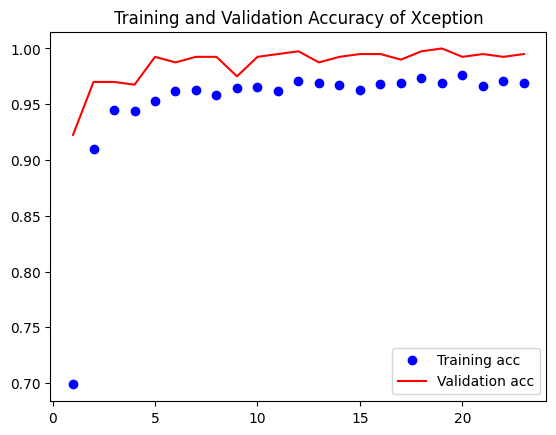

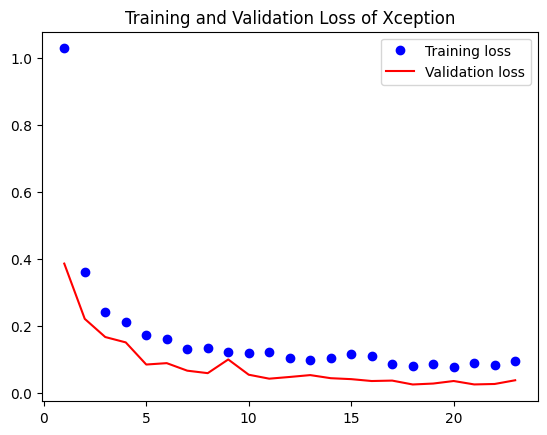

In [30]:
# 繪製訓練結果
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and Validation Accuracy of Xception")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and Validation Loss of Xception")
plt.legend()
plt.show()